In [35]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [36]:
data = np.load("pneumoniamnist.npz")
X_train = data['train_images']
y_train = data['train_labels']
X_val = data['val_images']
y_val = data['val_labels']
X_test = data['test_images']
y_test = data['test_labels']

In [37]:
# Normalize pixel values
X_train = X_train / 255.0
X_val = X_val / 255.0
X_test = X_test / 255.0

In [38]:
# Reshape images for CNN

X_train = X_train.reshape(-1, 28, 28, 1)
X_val = X_val.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)


In [39]:
# one-hot encode labels
y_train = to_categorical(y_train, 2)
y_val = to_categorical(y_val, 2)
y_test = to_categorical(y_test, 2)

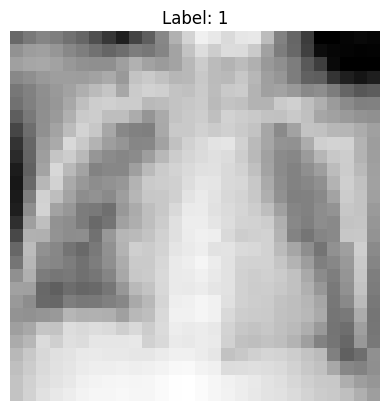

In [40]:
plt.imshow(X_train[0].reshape(28,28), cmap='gray')
plt.title(f"Label: {np.argmax(y_train[0])}")  # 0 = Normal, 1 = Pneumonia
plt.axis('off')
plt.show()


In [41]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(2, activation='softmax')
])

In [42]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [43]:
history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=10)

Epoch 1/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.7600 - loss: 0.5105 - val_accuracy: 0.8740 - val_loss: 0.2620
Epoch 2/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.9152 - loss: 0.1964 - val_accuracy: 0.9332 - val_loss: 0.1663
Epoch 3/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - accuracy: 0.9380 - loss: 0.1559 - val_accuracy: 0.9313 - val_loss: 0.1423
Epoch 4/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.9421 - loss: 0.1425 - val_accuracy: 0.9218 - val_loss: 0.1864
Epoch 5/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.9556 - loss: 0.1206 - val_accuracy: 0.9637 - val_loss: 0.1080
Epoch 6/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.9590 - loss: 0.1176 - val_accuracy: 0.9618 - val_loss: 0.0940
Epoch 7/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.9602 - loss: 0.1081 - val_accuracy: 0.9618 - val_loss: 0.0864
Epoch 8/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - accuracy: 0.9577 - loss: 0.1014 - val_accu

In [45]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(" Test Accuracy:", test_acc)

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8440 - loss: 0.5842
 Test Accuracy: 0.8477563858032227


In [47]:
sample = X_test[0].reshape(1, 28, 28, 1)
prediction = model.predict(sample)

predicted_class = np.argmax(prediction[0])
actual_class = np.argmax(y_test[0])

print("Predicted:", "Pneumonia" if predicted_class == 1 else "Normal")
print("Actual   :", "Pneumonia" if actual_class == 1 else "Normal")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
Predicted: Pneumonia
Actual   : Pneumonia
